In [5]:
import numpy as np
from sys import path

path.append('src/')
from samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from american_monte_carlo import PricerAmericanMonteCarlo
from basis_functions import PolynomialTransformer
import matplotlib.pyplot as plt
from BinomialTree import price_gbm_put


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Rainbow Wiener 2-dimensional

In [10]:
sampler = WienerRainbowPutOptionSampler(
    cnt_trajectories=1_000_000,
    cnt_times=3,
    t=1,
    time_grid = None,
    seed = 345,
    sigmas = [1., 1.],
    strike=0.
)

sampler.sample()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

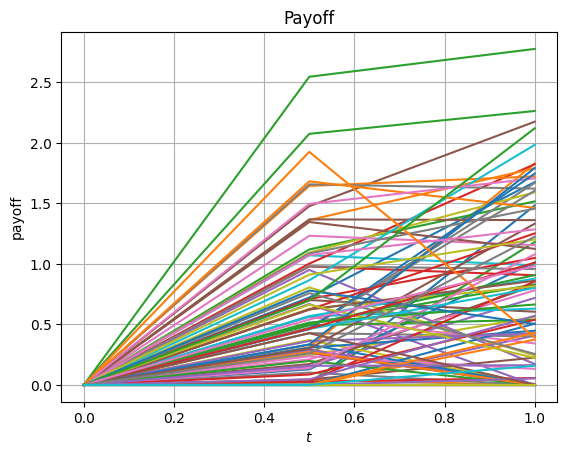

In [7]:
sampler.plot(100)

In [8]:
in_the_money_indices = np.where(sampler.payoff[:, 1] > 1e-9)[0]
len(in_the_money_indices)

749942

In [9]:
features = sampler.markov_state[in_the_money_indices, 1]
transformed = PolynomialTransformer(5).fit_transform(features)
transformed.shape

(749942, 21)

In [10]:
regularization = np.eye(transformed.shape[1], dtype=float) * 0.
inv = np.linalg.pinv((transformed.T @ transformed + regularization), rcond=1e-4)
weights = inv @ transformed.T @ sampler.payoff[in_the_money_indices, 2]
continuation_value = transformed @ weights

In [11]:
indicator = (continuation_value < sampler.payoff[in_the_money_indices, 1])
indicator.sum()

1109

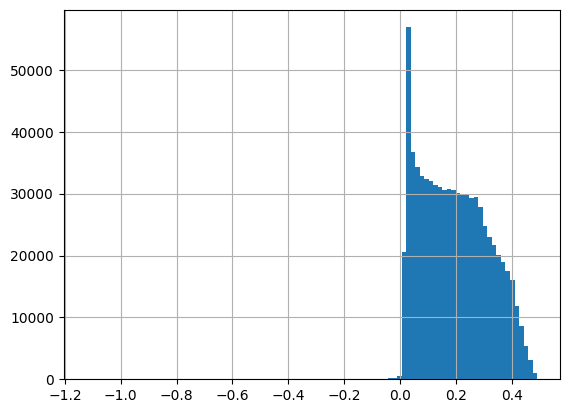

In [12]:
plt.hist(continuation_value - sampler.payoff[in_the_money_indices, 1], bins=100);
plt.grid()

In [11]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t=1,
        time_grid = None,
        seed = 345,
        sigmas = [1., 1.],
        strike=0.
    ),
    regularization_alpha=1e-4
)

In [12]:
from sklearn.preprocessing import PolynomialFeatures


In [13]:
PolynomialFeatures(degree=2).fit_transform(np.array([[1,2], [3,4]]).reshape(2, -1))

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

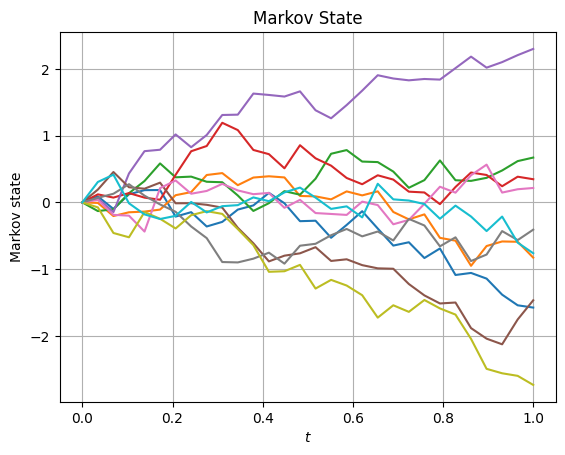

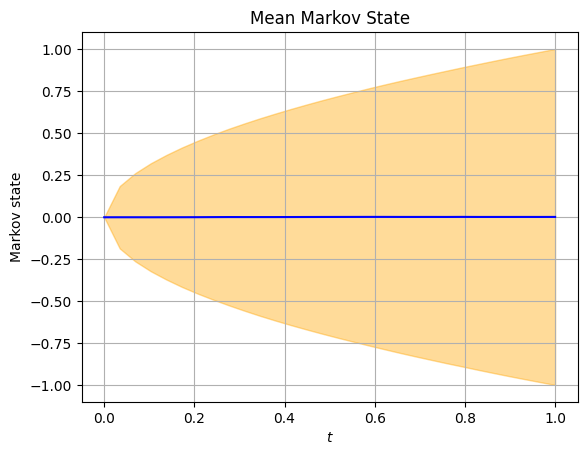

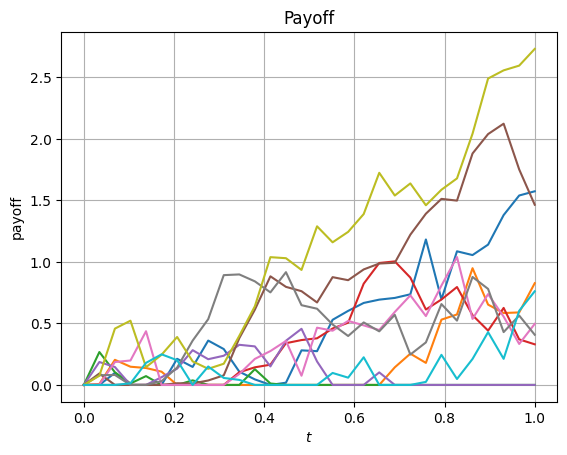

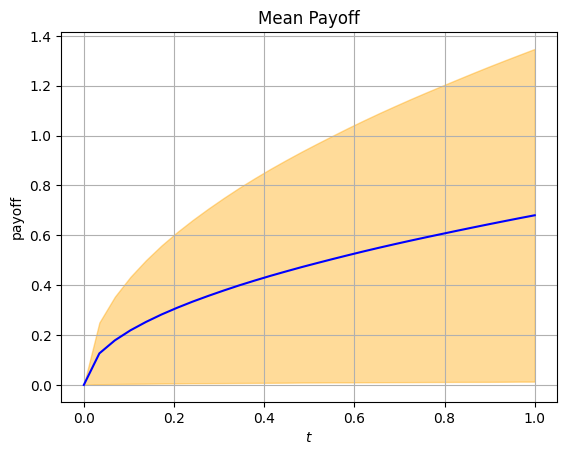

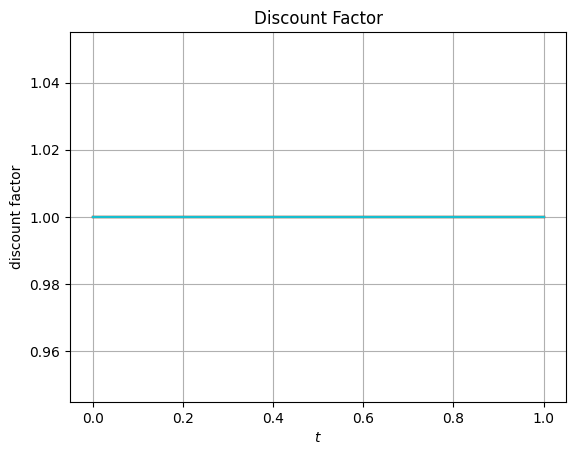

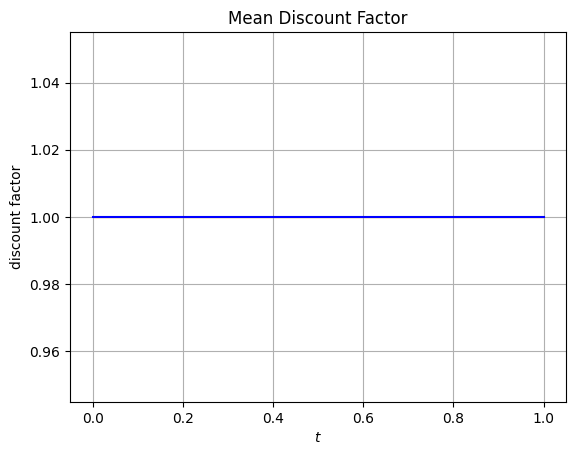

  0%|          | 0/29 [00:00<?, ?it/s]

28
27
26
25
24
23
22
21
20


 28%|##7       | 8/29 [00:01<00:04,  4.70it/s]

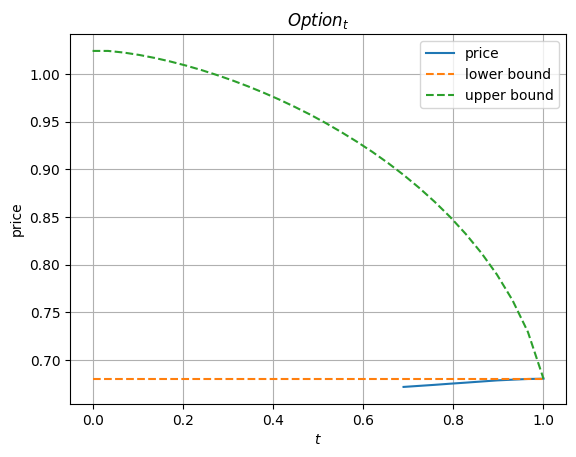

19
18
17
16
15
14
13
12
11
10


 62%|######2   | 18/29 [00:04<00:02,  4.82it/s]

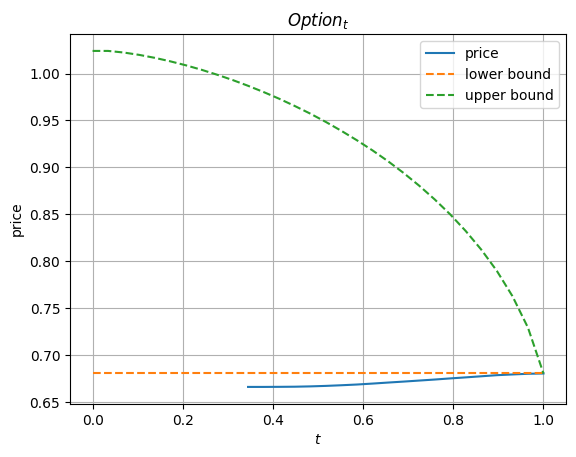

9
8
7
6
5
4
3
2
1
0


 97%|#########6| 28/29 [00:06<00:00,  5.00it/s]

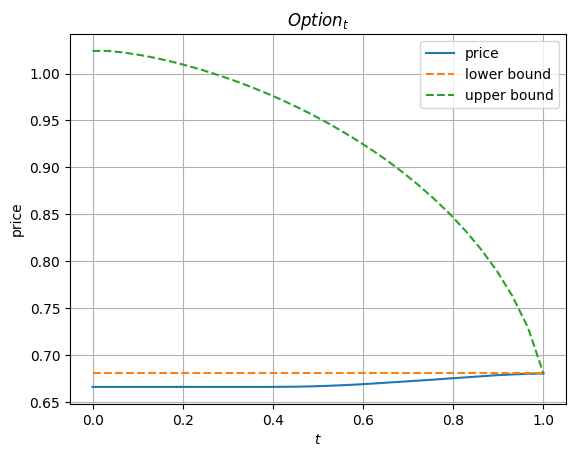

/Users/vanyavorobiov/projects/AmericanOptionsPricingApproaches/src/abstracts.py:45: UserWarning: We cannot plot >=2d processes
  warnings.warn("We cannot plot >=2d processes")


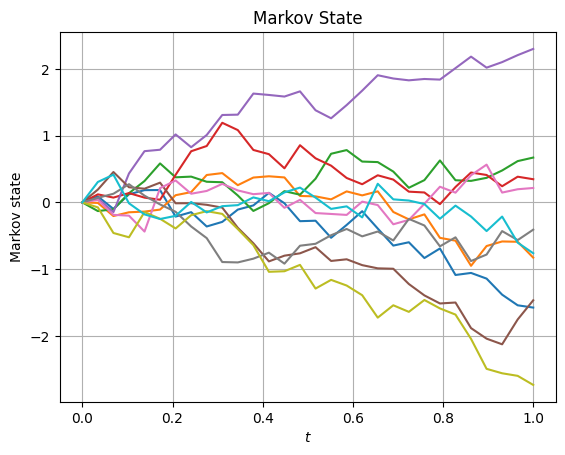

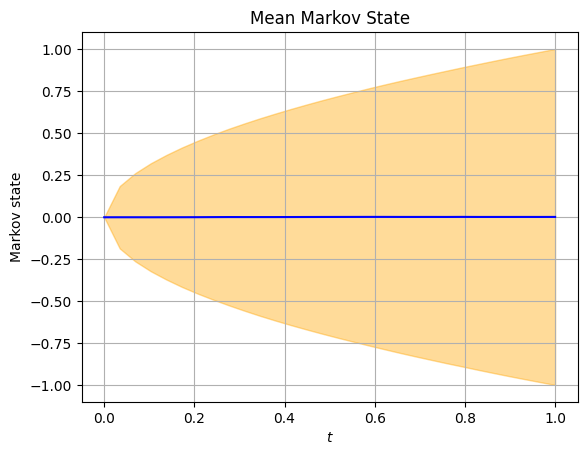

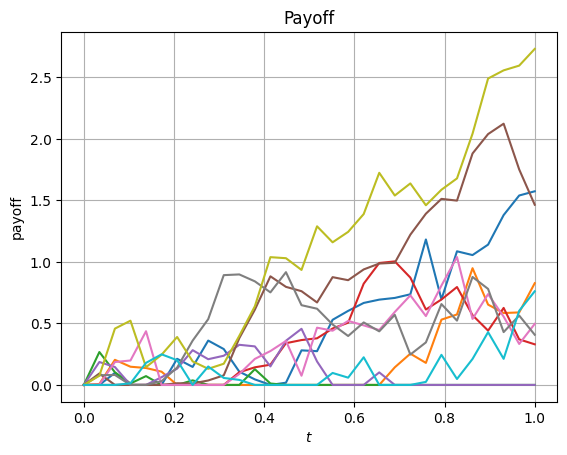

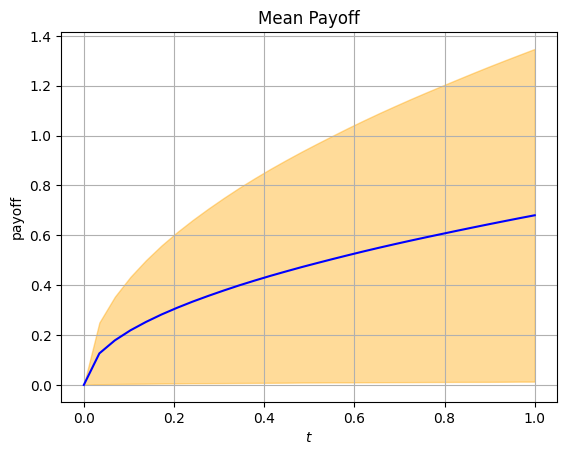

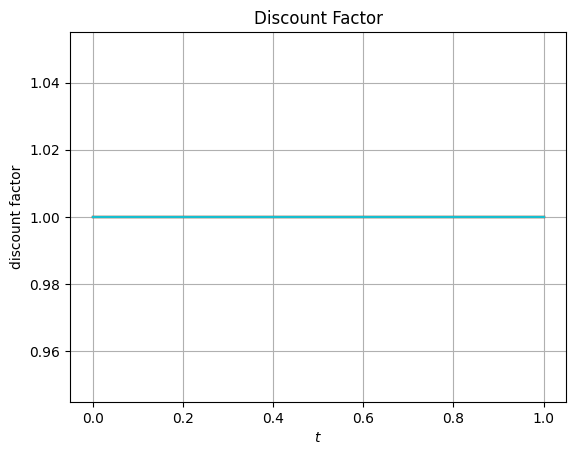

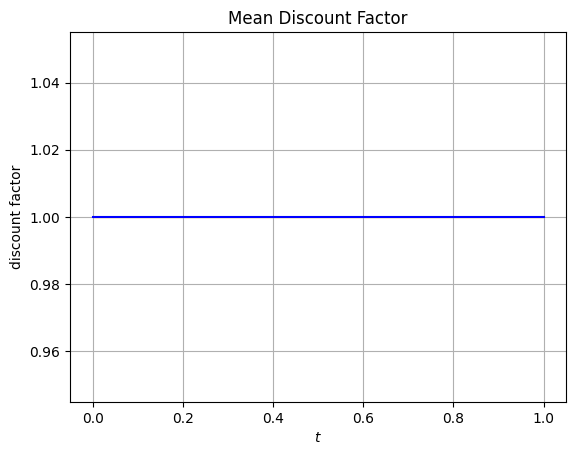

[0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661654147755687,
 0.6661672807762573,
 0.6662548132318624,
 0.6663917402526037,
 0.666736818004094,
 0.6672561405657789,
 0.6679468093366515,
 0.6687228720347265,
 0.6697217352328577,
 0.6708108044402279,
 0.6718468858462555,
 0.6729387435351212,
 0.6740326670350022,
 0.6752275202645704,
 0.6763392052120702,
 0.677504588017272,
 0.6786758291941845,
 0.6794463459304917,
 0.6801702793206467,
 0.6804651201349422]

In [16]:
amc.price(
    test=False,
    quiet=False
)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

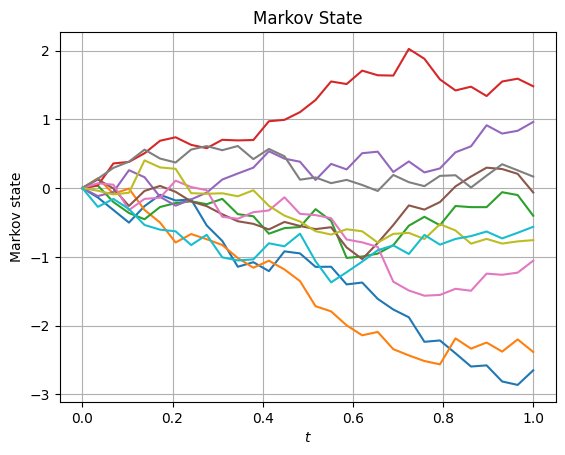

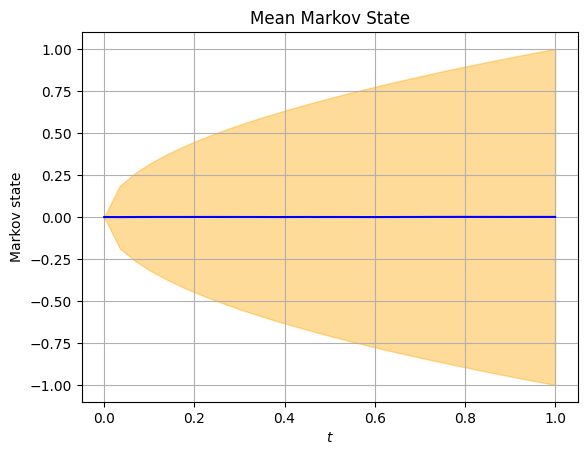

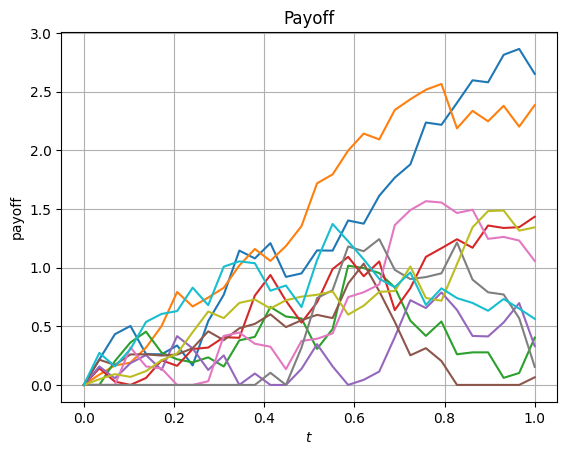

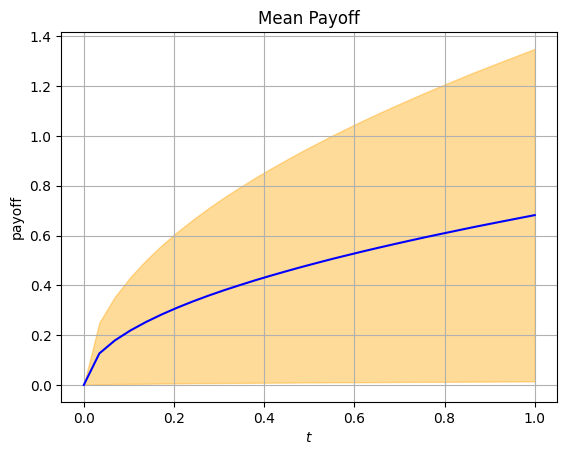

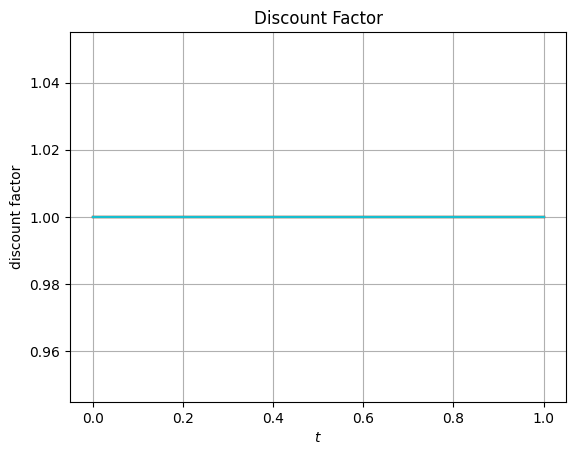

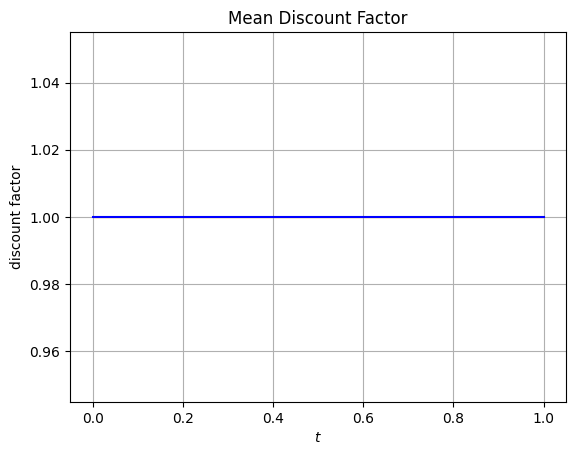

  0%|          | 0/29 [00:00<?, ?it/s]

28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


 48%|####8     | 14/29 [00:00<00:00, 132.95it/s]

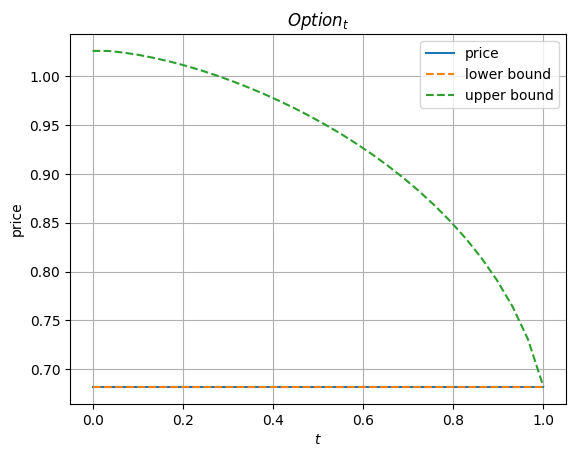

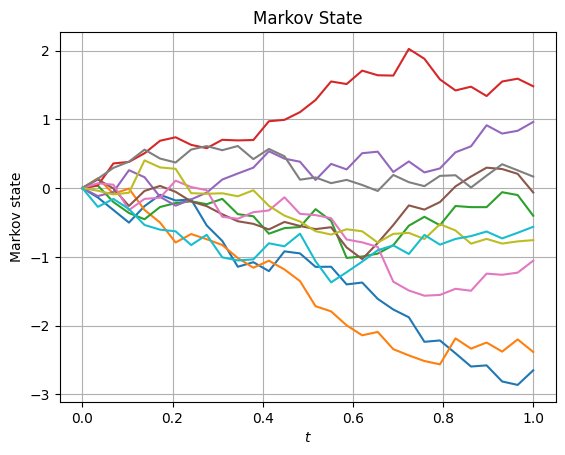

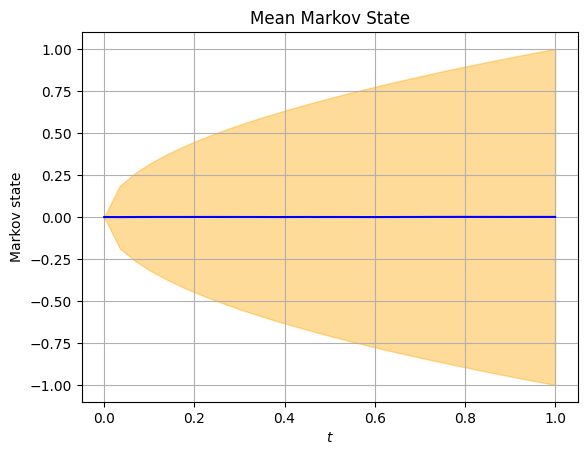

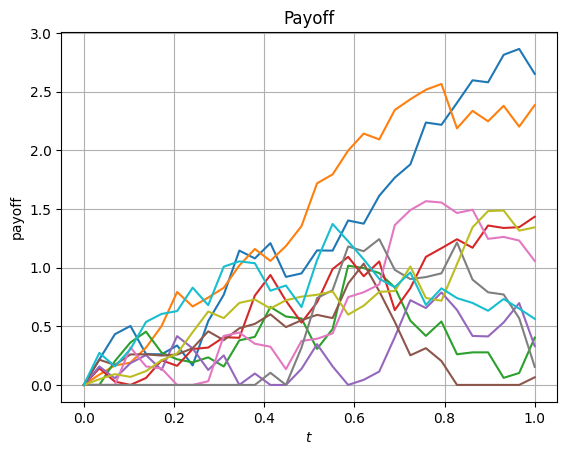

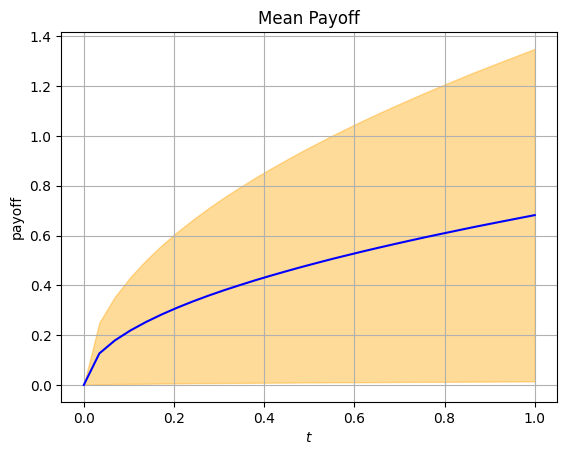

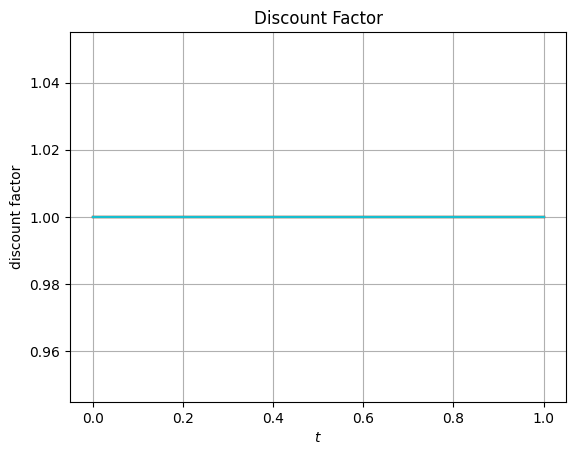

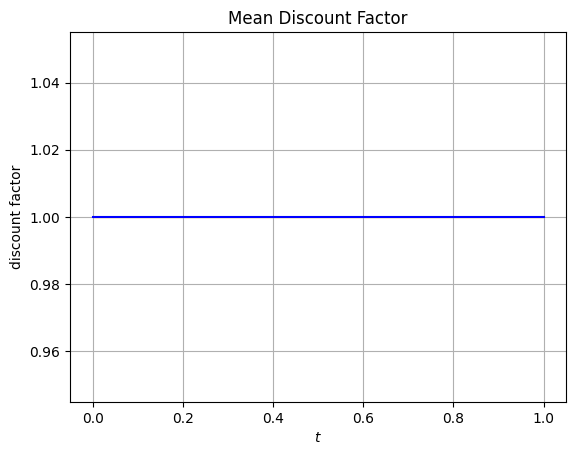

[0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767]

In [15]:
amc.price(
    test=True,
    quiet=False
)

# GBM put

In [17]:
option_params = {
    "asset0": 100.,
    "sigma": 0.1,
    "mu": 0.05,
    "strike": 100.,
    "t": 1
}

## Tree

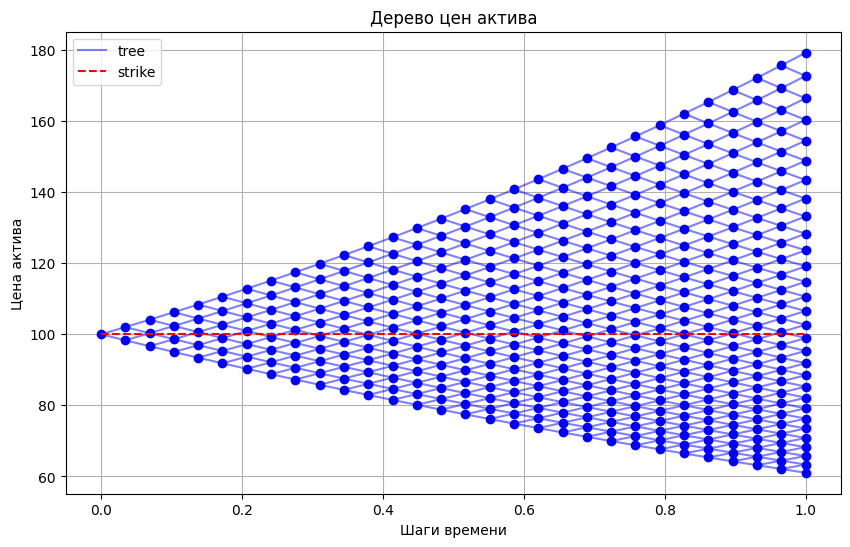

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.5316557   3.03594657  6.57104957
  9.97727024 13.25930736 16.42168838 19.46877573 22.40477275 25.23372958
 27.95954865 30.58599017 33.11667722 35.55510081 37.90462466]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.26536978  1.7807276   4.96748762  8.43217074
 11.7705389  14.98719725 18.08658309 21.07297192 23.95048336 26.72308687
 29.39460715 31.96872949 34.44900481 36.83885457]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.13245625  1.02128593  3.36829435  6.86055203 10.25621805
 13.52808532 16.68066728 19.7183128  22.64521224 25.46540315 28.1827759
 30.80107903 33.3239244  35.75479219]
[ 0.          0.       

In [18]:
cashflows, price_history = price_gbm_put(
    **option_params,
    cnt_times=30
)

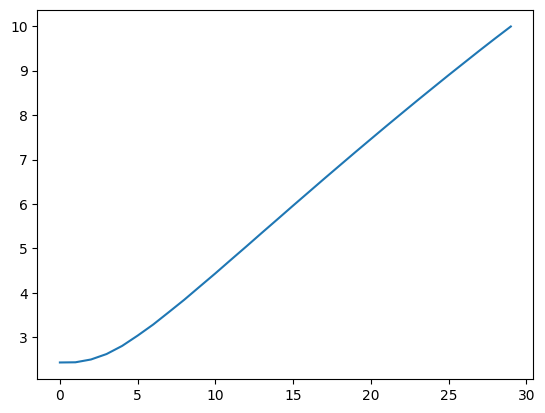

In [21]:
plt.plot(price_history)

In [22]:
price_history[0]

2.4364301552078595

## AMC

In [31]:
amc = PricerAmericanMonteCarlo(
    sampler = GeometricBrownianMotionPutSampler(
        cnt_trajectories = 1_000_000,
        cnt_times = 30,
        seed = 345,
        **option_params
    ),
    regularization_alpha = 1e-3
)

 93%|#########3| 27/29 [00:01<00:00, 16.39it/s]

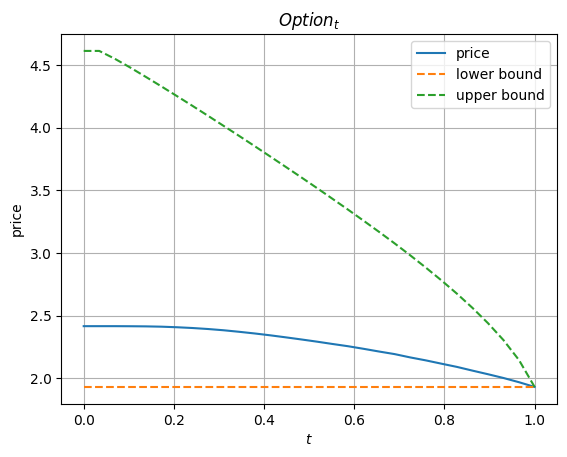

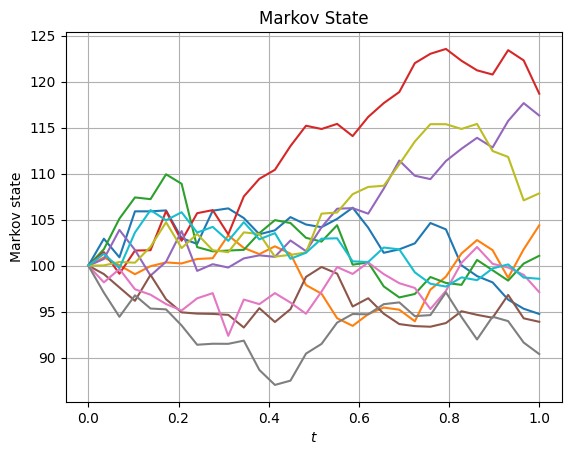

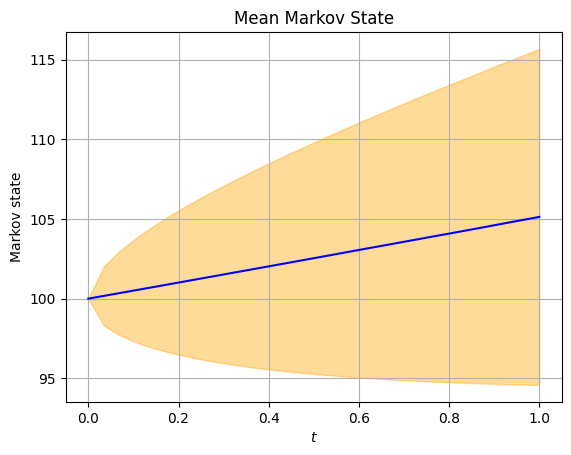

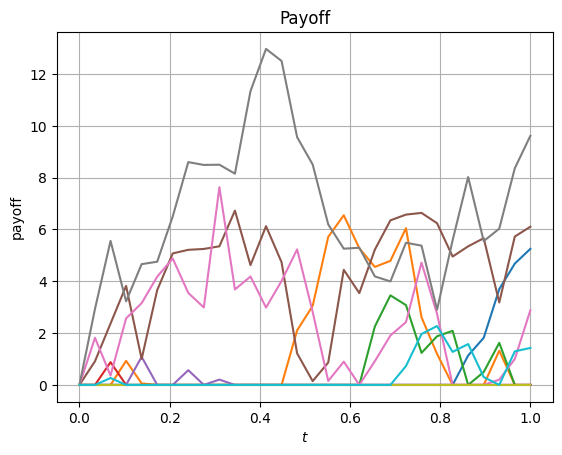

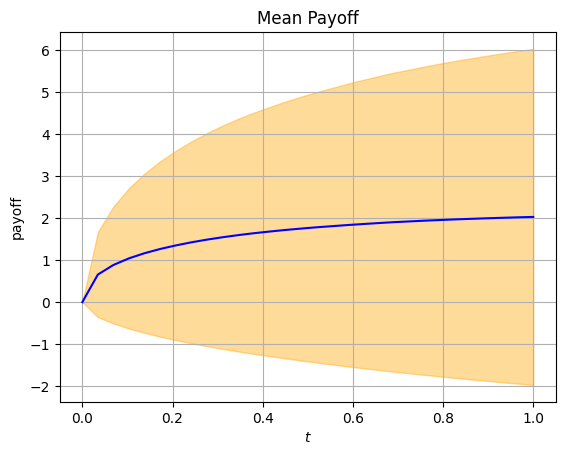

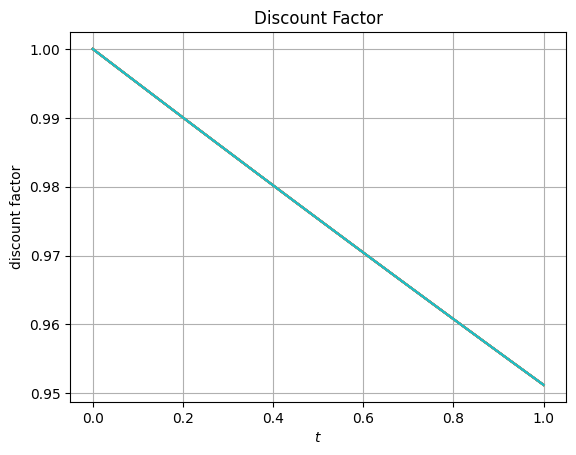

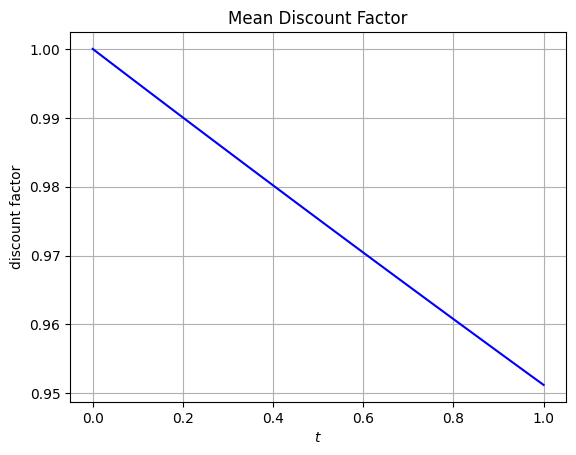

[2.4160417992387,
 2.4160417992387,
 2.416063493192605,
 2.415451606895332,
 2.414360534297422,
 2.411920966154168,
 2.40740716192971,
 2.4012858117213143,
 2.3932722131379025,
 2.3833358325697174,
 2.3710925257917936,
 2.357717080809089,
 2.342969664884769,
 2.3267729683298177,
 2.309957416466775,
 2.292488467386773,
 2.273912574319655,
 2.2560105703523723,
 2.23535594792742,
 2.2136054568132804,
 2.1930256210863623,
 2.1666271590849253,
 2.1431110552494905,
 2.116837015326144,
 2.091097668833211,
 2.0613599834999454,
 2.032537231879295,
 2.0023853482174303,
 1.9686465152592907,
 1.9312121155204913]

In [32]:
amc.price(
    test=False,
    quiet=False
)

In [26]:
amc.price_history

[2.4158709393557007,
 2.4158709393557007,
 2.4158968450148217,
 2.415366361103085,
 2.4141686946733723,
 2.4116495144025096,
 2.40681723147934,
 2.400722830323063,
 2.392750879782395,
 2.382773751146614,
 2.3704390666738484,
 2.3574301653218637,
 2.3425812286793395,
 2.32667079413024,
 2.30967496509587,
 2.2923398702000264,
 2.2736834426616066,
 2.255561092921141,
 2.235169811655351,
 2.2134841989042533,
 2.1927717458455454,
 2.166510042173122,
 2.142892562626953,
 2.1165517807756897,
 2.090924255593508,
 2.0613253917759438,
 2.0323844615054902,
 2.002365357024555,
 1.9686244877945425,
 1.9312121155204913]

In [ ]:
(X^T X + alpha E)^{-1} X^T y = weigts

In [ ]:
1, gbm(t), gbm(t)^2, gbm(t)^3

In [4]:
amc.price(
    test=True,
    quiet=False
)

NameError: name 'amc' is not defined